In [1]:
%pip install seaborn
%pip install plotly

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
df = pd.read_csv('train.csv')

QUESTION-1

In [8]:
df.head(6) 

#head() function returns the first n rows for the object based on position.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


QUESTION-2

In [7]:
print("Column headers from train.cvs:", list(df.columns.values))

#using columns attribute with dataframe object allows us to access the column headers
#column.values method returns an array of index. 

Column headers from train.cvs: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


QUESTION-3 

In [107]:
#print("Number of rows and columns of the train.cvs dataset:", df.shape)
print("Number of passengers:", len(df))

#shape returns a tuple that represents rows and columns as the value of dimensions
#The len() function returns the number of items in an object. 

Number of passengers: 891


QUESTION-4 

In [9]:
print("Number of missing values for each colums:")
print("Age:", df["Age"].isnull().sum())
print("Cabin:", df["Cabin"].isnull().sum())
print("Embarked:", df["Embarked"].isnull().sum())

#we use isnull() function this function return dataframe of Boolean values 
#which are True for NaN values and calling sum() of the DataFrame returned by isnull() will give the count of total NaN in dataframe.

Number of missing values for each colums:
Age: 177
Cabin: 687
Embarked: 2


QUESTION-5 

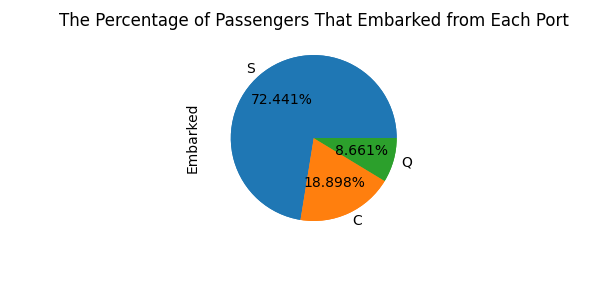

In [149]:
sizes=df['Embarked'].value_counts()
df['Embarked'].value_counts().plot.pie()
plt.pie(sizes, autopct='%.3f%%')
plt.title("The Percentage of Passengers That Embarked from Each Port")
plt.show()

#value_counts returns a reries containing counts of unique values.
#plot.pie() makes a pie chart with embarked value_counts
#The highest number of passengers embarkedfrom port S, while the least number of passengers embarked from port Q.

QUESTION-6

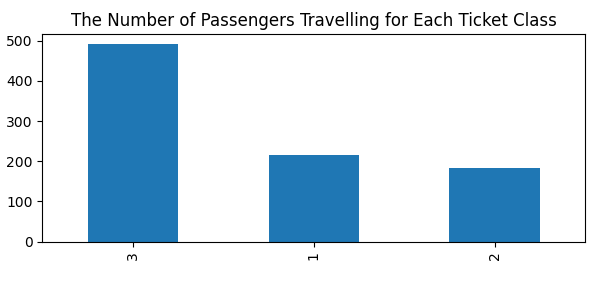

In [150]:
sizes=df['Pclass'].value_counts()
df['Pclass'].value_counts().plot.bar()
plt.bar(sizes, 0, 0, 0)
plt.title("The Number of Passengers Travelling for Each Ticket Class")
plt.show()

#plot.bar() makes a bar chart with Pclass value_counts
#0,0,0 refers to height,  width and bottom parameters
#The maximum number of passengers is in the 3rd ticket class.

QUESTION-7 

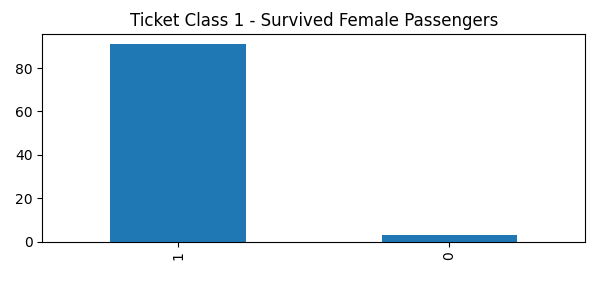

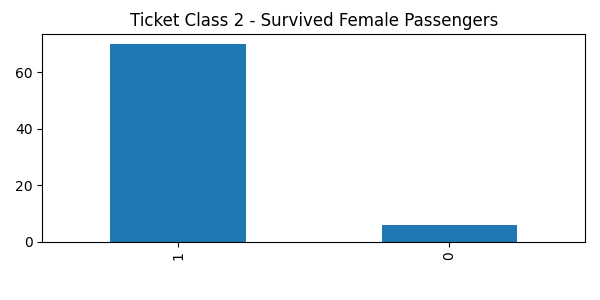

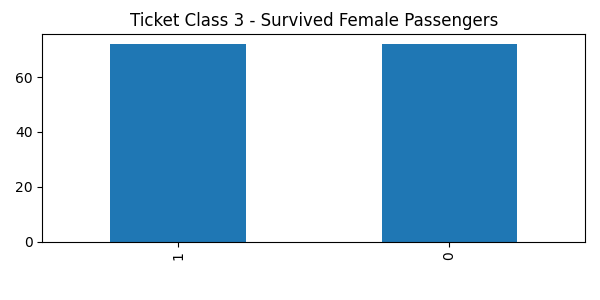

In [151]:
df2=df[df["Sex"].isin(["female"])] 
c1=df2[df2["Pclass"].isin([1])]
c1['Survived'].value_counts().plot.bar()
plt.title("Ticket Class 1 - Survived Female Passengers")
plt.show()
plt.close()

c2=df2[df2["Pclass"].isin([2])]
c2['Survived'].value_counts().plot.bar()
plt.title("Ticket Class 2 - Survived Female Passengers")
plt.show()
plt.close()

c3=df2[df2["Pclass"].isin([3])]
c3['Survived'].value_counts().plot.bar()
plt.title("Ticket Class 3 - Survived Female Passengers")
plt.show()
plt.close()

#isin() returns whether each element in the DataFrame is contained in values.
#df2=df[df["Sex"].isin(["female"])] this type of operation gives us the data set with the values we control with the isin() function.
#close() by itself closes the current figure.

QUESTION-8

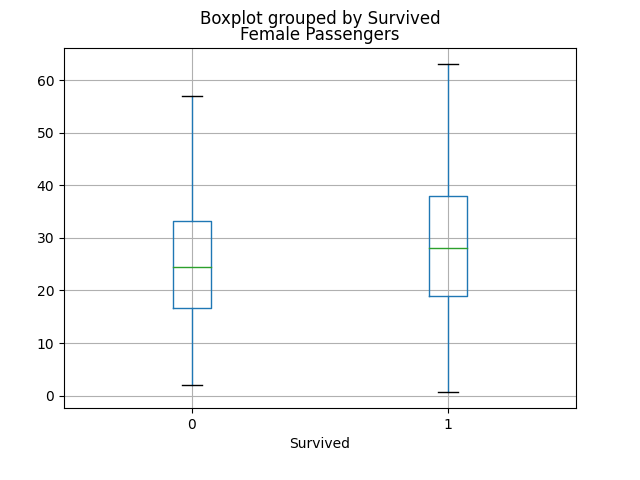

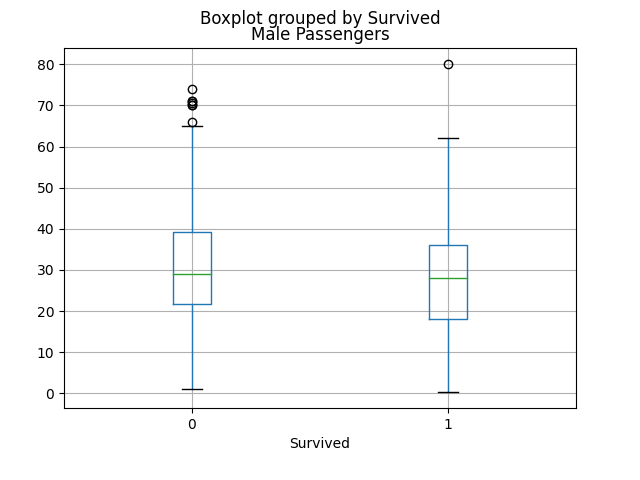

In [152]:
female=df[df["Sex"].isin(["female"])] #we filter the dataset by female or male
female.boxplot(by ='Survived', column =['Age'], grid = True)
plt.title("Female Passengers")
plt.show()
plt.close()

male=df[df["Sex"].isin(["male"])]
male.boxplot(by ='Survived', column =['Age'], grid = True)
plt.title("Male Passengers")
plt.show()
plt.close() #close() by itself closes the current figure.

#boxplot() function makes a box-and-whisker plot from DataFrame columns, optionally grouped by some other columns. 

QUESTION-9-10

In [117]:
pd.crosstab(index=df['Sex'], columns=df['Survived'], margins=True)
#crosstab() computes a simple cross tabulation of two (or more) factors.
#margins= true, add row/column margins (subtotals).
#The number of surviving women is higher. The survival rate is also higher in women. 
#Considering the current emergency situation, I think that women and children are given priority. 
#Therefore, the survival rate is higher in women.

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


QUESTION-11

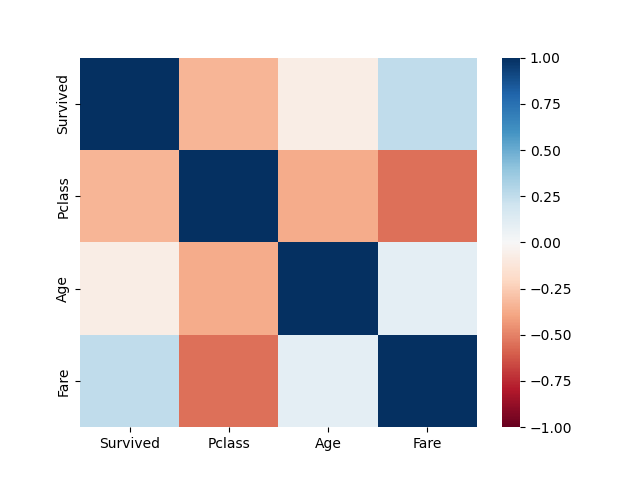

In [153]:
cols = ["Survived","Pclass","Sex","Age","Fare"]
df_corr = df[cols].corr()
sns.heatmap(df_corr, cmap='RdBu', vmin=-1, vmax=1)
plt.show()

#We first need to create a correlation matrix. This is very easy to do by calling upon the .corr() method.
#We can then call upon the seaborn heatmap using sns.heatmap() and passing in the correlation matric ( corr).
#We can easily change the colours for our heatmap by providing a palette for the cmap argument and we can control color range so that it is equal by using the vmin and vmax arguments

QUESTION-12

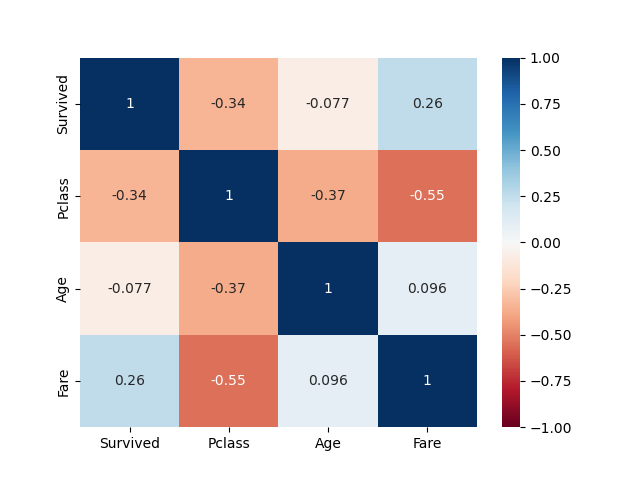

In [154]:
sns.heatmap(df_corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

##.corr() with df to get the Pearson correlation coefficient
#To add numbers to our heatmap we simply add-in annot=True.

QUESTION-13

In [19]:
youngPass=df['Age'].min()
print("The age of the youngest passenger is", youngPass)

#min() returns the minimum of the values over the requested axis.

The age of the youngest passenger is 0.42


QUESTION-14

In [20]:
aveFare = df["Fare"].mean()
print("The average fare:", aveFare)

#mean() returns the mean of the values over the requested axis.

The average fare: 32.204207968574636


QUESTION-15 

In [158]:
surPass=df[df["Survived"].isin([1])] #we filter the dataset by survived or not
surPassAge=surPass['Age'].max()
print("The age of the oldest passenger who survived:", surPassAge)

#max() returns the maximum of the values over the requested axis.

The age of the oldest passenger who survived: 80.0


QUESTION-16 

In [159]:
surPass=df[df["Survived"].isin([1])] #we filter the dataset by survived or not
female=surPass[surPass["Sex"].isin(["female"])] #we filter the dataset by female or male
surPassAge=female['Age'].max() 
print("The age of the oldest female passenger who survived:", surPassAge)

The age of the oldest female passenger who survived: 63.0


QUESTION-17 

In [5]:
df2=df[(df["Age"]<10) & (df["Parch"]==0)] #we filter the dataset by under the age of 10
print("There are", df2["Age"].count(), "children under the age of 10 traveling without their parents")
df2

#We specify a condition with <10 and assign the matching data set to df2.
#count() counts non-NA cells for each column or row.

There are 1 children under the age of 10 traveling without their parents


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S


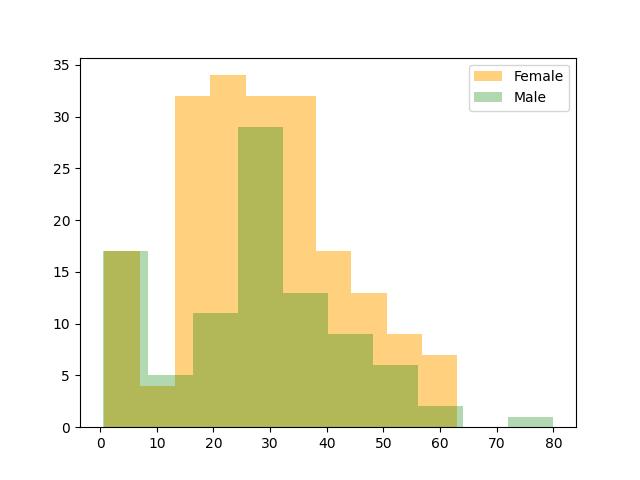

In [156]:
df2=df[df["Survived"].isin([1])] #we filter the dataset by survived 
df3=df2[df2["Sex"].isin(["female"])] #we filter the dataset by female or male
df4=df2[df2["Sex"].isin(["male"])]


plt.hist(df3["Age"], 
         alpha=0.5, # the transaparency parameter
         label='Female',
         color='orange') # customized color parameter
plt.hist(df4["Age"], 
         alpha=0.3,
         label='Male',
         color='green')
plt.legend(loc='upper right')  #to show which color belongs to which data
plt.show()

#Passengers under the age of 65, and especially female passengers, have a higher chance of survival compared to this graph.

QUESTION-19

In [24]:
sib=df['SibSp'].max() 
print("The number of siblings of the passenger who has the highest number of siblings:", sib)

The number of siblings of the passenger who has the highest number of siblings: 8


QUESTION-20 

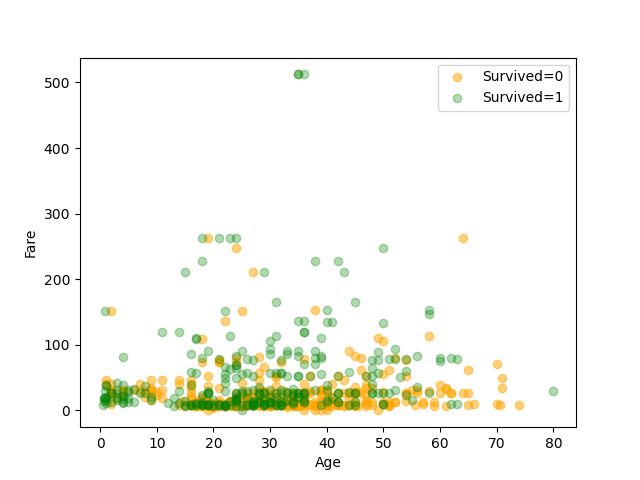

In [157]:
df2=df[df["Survived"].isin([0])] #we filter the dataset by survived or not
df3=df[df["Survived"].isin([1])] 

plt.scatter(df2["Age"], 
            df2["Fare"],
         alpha=0.5, #the transaparency parameter
         label='Survived=0',
         color='orange') #customized color parameter
plt.scatter(df3["Age"],
         df3["Fare"],
         alpha=0.3,
         label='Survived=1',
         color='green')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(loc='upper right') #to show which color belongs to which data
plt.show()